In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
plt.style.use('bmh')

D:\_application\Python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load Data
df=pd.read_csv('NFLX_Stock.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/16/2015,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,12/17/2015,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,12/18/2015,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,12/21/2015,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,12/22/2015,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,12/23/2015,116.910004,118.559998,115.779999,118.160004,118.160004,9324300


In [3]:
# Getting the number of trading days in the data set 
df.shape

(1007, 7)

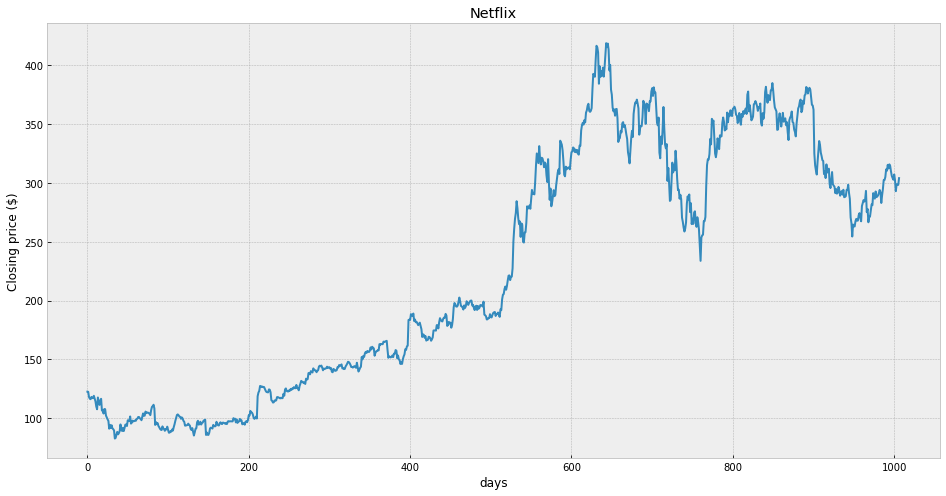

In [4]:
# visualize the close price data 
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('days')
plt.ylabel('Closing price ($)')
plt.plot(df['Close'])
plt.show()

In [11]:
# Get the close price 
df=df[['Close']]
df.head()

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997
4,116.239998


In [12]:
# create a variable to predict 'x' days into the future 
future_days=25
# create a new column (target) shifted 'x' units/days up
df['Prediction']=df[['Close']].shift(-future_days)
df.head()

D:\_application\software\Anconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
0,122.639999,99.120003
1,122.510002,97.830002
2,118.019997,91.150002
3,116.629997,94.410004
4,116.239998,91.839996


In [13]:
# to see the last values 
df.tail()

,Close,Prediction
1002,293.119995,NaN
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [14]:
# create the feature data set (X) and convert it to a numpy array and remove the last 'X' rows/days
X=np.array(df.drop(['Prediction'], 1)) [:-future_days]
print (X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [15]:
# Create the target data set (y) and convert it to numpy array and get all the target values except the last 'X' days/rows
Y=np.array(df['Prediction'])[:-future_days]
print(Y)

[ 99.120003  97.830002  91.150002  94.410004  91.839996  94.089996
  91.489998  90.739998  89.709999  82.790001  83.32      86.129997
  88.449997  86.349998  87.400002  89.050003  94.760002  90.489998
  89.230003  91.93      89.120003  91.610001  94.529999  94.790001
  93.410004  98.300003  97.610001  97.93     101.580002  95.489998
  96.230003  98.        97.360001  97.660004  98.129997  97.860001
  99.349998  99.720001 101.120003 101.059998  99.839996  99.589996
  98.360001 101.209999 104.129997 102.190002 102.230003 105.699997
 104.349998 104.940002 104.830002 104.449997 103.809998 102.68
 106.980003 109.650002 110.419998 111.510002 108.400002  94.339996
  96.769997  94.980003  95.900002  93.559998  92.43      91.040001
  90.279999  90.029999  93.110001  91.540001  90.790001  89.370003
  90.839996  90.540001  92.889999  90.019997  87.739998  87.879997
  89.120003  88.629997  90.5       89.550003  92.489998  94.889999
  97.889999 100.199997 102.809998 103.300003 102.57     101.510002

In [18]:
# Split the data into 75% training and 25% testing 
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25)

In [47]:
# Create the models 
# create the Decison Tree Regressor Model 
tree=DecisionTreeRegressor().fit(X_train, Y_train)
# create a Linear regoression model 
lr=LinearRegression().fit(X_train, Y_train)



In [22]:
# Get the last 'X' rows of the feature dataset
X_future=df.drop(['Prediction'], 1)[:-future_days]
X_future=X_future.tail(future_days)

# set it as numpy array
X_future=np.array(X_future)
X_future

array([[274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.350006],
       [275.299988],
       [278.049988],
       [266.690002],
       [271.269989],
       [271.5     ],
       [276.820007],
       [281.859985],
       [281.209991],
       [291.450012],
       [287.410004],
       [286.809998],
       [292.859985],
       [288.029999],
       [288.589996],
       [289.570007],
       [291.570007]])

In [48]:
#Show the model tree prediction 
tree_prediction=tree.predict(X_future)
print(tree_prediction)
print()

#show the model linear regression prediction 
lr_prediction=lr.predict(X_future)
print(lr_prediction)


[294.179993 292.01001  283.109985 289.619995 295.029999 311.690002
 325.220001 305.160004 311.690002 337.589996 315.549988 335.660004
 315.929993 315.929993 315.549988 304.320007 304.320007 302.859985
 307.350006 246.389999 280.480011 298.929993 298.440002 298.5
 304.209991]

[276.98689798 273.42229868 270.38189512 282.72460292 285.05969048
 287.53776651 286.31779439 288.25259449 294.9910462  277.78750245
 280.40853836 269.58129064 273.94649442 274.16571882 279.23623859
 284.03986161 283.42034975 293.18015438 289.32960673 288.75773863
 294.52400524 289.92052643 290.45426179 291.38831416 293.29452209]


D:\_application\software\Anconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


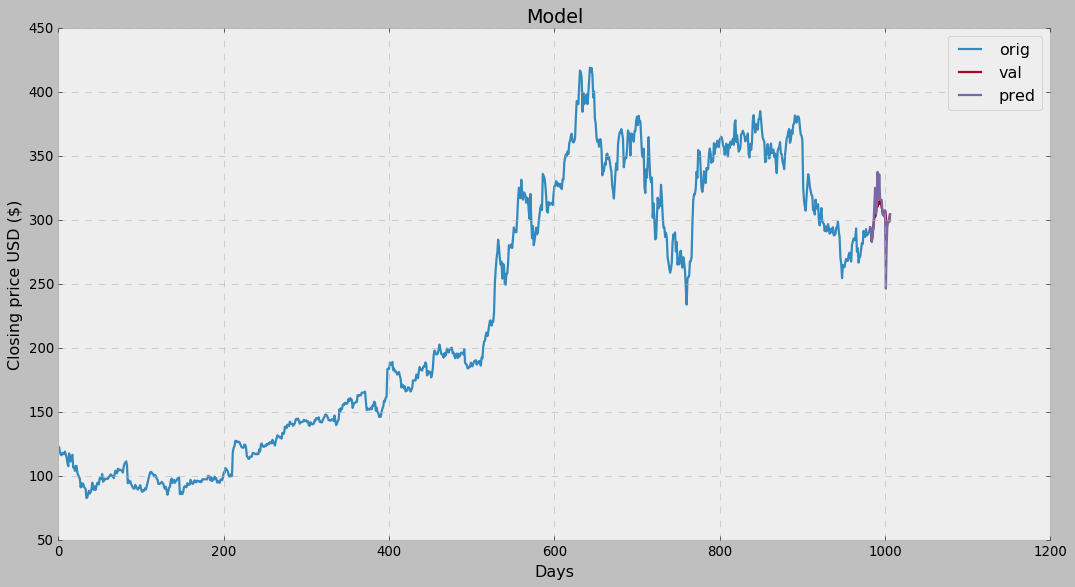

In [39]:
# Visualize data predicted using decision tree
predictions=tree_prediction

valid=df[X.shape[0]:]
# create a new column for valid to reprsent the prediction data above 
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['orig', 'val','pred'])
plt.show()

D:\_application\software\Anconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


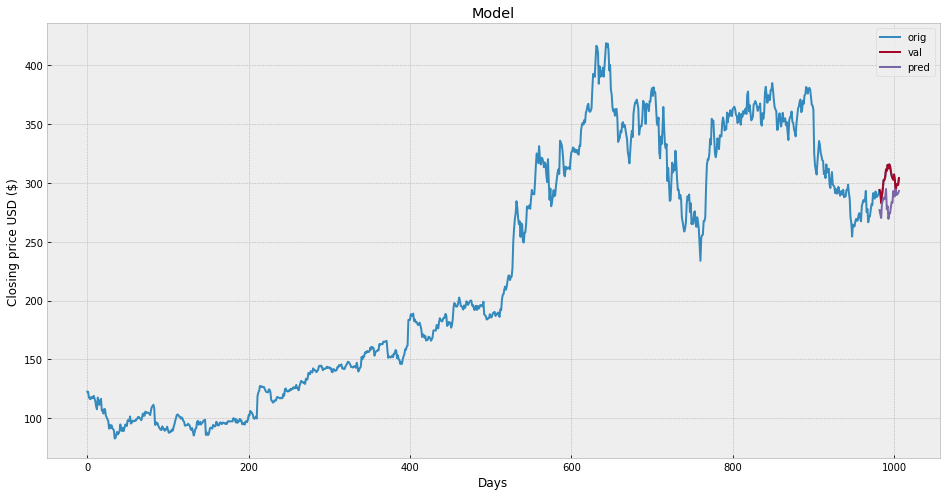

In [32]:
# Visualize data predicted using Linear regression
predictions=lr_prediction

valid=df[X.shape[0]:]
# create a new column for valid to reprsent the prediction data above 
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['orig', 'val','pred'])
plt.show()